
# Домашнее задание к лекции "Статистика. Практика"

### Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?
2) Критикам нравятся больше игры на PC или на PS4?
3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

* сформулируйте нулевую и альтернативную гипотезы;
* выберите пороговый уровень статистической значимости;
* опишите полученные результаты статистического теста.

### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;
2) Удалите мусорные символы;
3) Удалите стоп-слова;
4) Привидите все слова к нормальной форме;
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

#### ПРИМЕЧАНИЕ

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Не сможем проверить или помочь, если вы пришлете:

* файлы;
* архивы;
* скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.
Как правильно задавать вопросы аспирантам, преподавателям и коллегам?

Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:

* Что я делаю?
* Какого результата я ожидаю?
* Как фактический результат отличается от ожидаемого?
* Что я уже попробовал сделать, чтобы исправить проблему?

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.


In [1]:
#Подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
import seaborn as sns

#### Задание 1

In [2]:
df_games = pd.read_csv('vgsales.csv')
df_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df_games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


**Как критики относятся к спортивным играм?**

H0: В среднем критики оценивают спорт игры также как и остальные.

H1: В среднем критики оценивают спорт игры иначе, чем остальные.

In [5]:
#Создаём df со спорт.играми и остальными
df_games_sport = df_games[['Name', 'Genre', 'Critic_Score']].loc[df_games['Genre'] == 'Sports']
df_games_no_sport = df_games[['Name', 'Genre', 'Critic_Score']].loc[df_games['Genre'] != 'Sports']

In [6]:
df_games_sport.describe()

,Critic_Score
count,1194.000000
mean,71.968174
std,13.878433
min,19.000000
25%,64.000000
50%,75.000000
75%,82.000000
max,98.000000


In [7]:
df_games_sport.info() #почти половина игр не имеет оценок от критиков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 16715
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2348 non-null   object 
 1   Genre         2348 non-null   object 
 2   Critic_Score  1194 non-null   float64
dtypes: float64(1), object(2)
memory usage: 73.4+ KB


(array([  7.,  11.,  31.,  53.,  91., 153., 231., 345., 232.,  40.]),
 array([19. , 26.9, 34.8, 42.7, 50.6, 58.5, 66.4, 74.3, 82.2, 90.1, 98. ]),
 <BarContainer object of 10 artists>)

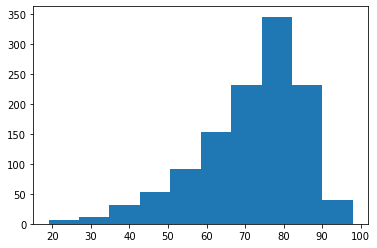

In [8]:
plt.hist(df_games_sport['Critic_Score'])

In [9]:
df_games_no_sport.describe()

,Critic_Score
count,6943.000000
mean,68.451678
std,13.884206
min,13.000000
25%,60.000000
50%,70.000000
75%,79.000000
max,98.000000


In [10]:
df_games_no_sport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 1 to 16718
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          14369 non-null  object 
 1   Genre         14369 non-null  object 
 2   Critic_Score  6943 non-null   float64
dtypes: float64(1), object(2)
memory usage: 449.1+ KB


(array([   8.,   46.,  159.,  297.,  700., 1085., 1679., 1562., 1140.,
         267.]),
 array([13. , 21.5, 30. , 38.5, 47. , 55.5, 64. , 72.5, 81. , 89.5, 98. ]),
 <BarContainer object of 10 artists>)

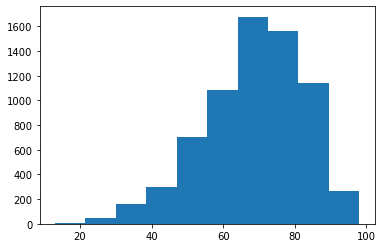

In [11]:
plt.hist(df_games_no_sport['Critic_Score'])

In [12]:
#Тест Манна-Уитни т.к. расрпеделение не относится к нормальному
stat, p = stats.mannwhitneyu(df_games_sport['Critic_Score'], df_games_no_sport['Critic_Score'], nan_policy = 'omit')
print(f'Статистика: {stat:.3f}, p: {p:.3f}')

if p < 0.5:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Статистика: 4839129.500, p: 0.000
Отвергаем нулевую гипотезу


In [13]:
if df_games_sport['Critic_Score'].mean() > df_games_no_sport['Critic_Score'].mean():
    print('В среднем критики оценивают спортивные игры выше, чем игры остальных жанров')
else:
    print('В среднем критики оценивают спортивные игры ниже, чем игры остальных жанров')

В среднем критики оценивают спортивные игры выше, чем игры остальных жанров


На основе результатов теста Манна-Уитни мы можем предположить, что в среднем критики оценивают спорт игры иначе, чем остальные игры, в данном датасэте. При том, что для более чем половины игр отсутствует оценка критиков, можно сказать о более высоких оценках спортивных игр, чем остальных.

**Критикам нравятся больше игры на PC или на PS4?**

H0: В среднем критики одинаково относятся к играм на PC и PS4

H1: В среднем критики по-разному относятся к играм на PC и PS4

In [14]:
#Создаём df играми PC и PS4
df_games_pc = df_games[['Name', 'Platform', 'Critic_Score']].loc[df_games['Platform'] == 'PC']
df_games_ps4 = df_games[['Name', 'Platform', 'Critic_Score']].loc[df_games['Platform'] == 'PS4']

In [15]:
df_games_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 85 to 16709
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          974 non-null    object 
 1   Platform      974 non-null    object 
 2   Critic_Score  715 non-null    float64
dtypes: float64(1), object(2)
memory usage: 30.4+ KB


In [16]:
df_games_pc.describe()

,Critic_Score
count,715.000000
mean,75.928671
std,11.170775
min,33.000000
25%,70.000000
50%,78.000000
75%,84.000000
max,96.000000


(array([  5.,   5.,  14.,  35.,  51.,  80., 161., 173., 131.,  60.]),
 array([33. , 39.3, 45.6, 51.9, 58.2, 64.5, 70.8, 77.1, 83.4, 89.7, 96. ]),
 <BarContainer object of 10 artists>)

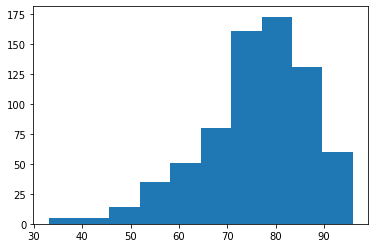

In [17]:
plt.hist(df_games_pc['Critic_Score'])

In [18]:
df_games_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 31 to 16589
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          393 non-null    object 
 1   Platform      393 non-null    object 
 2   Critic_Score  252 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.3+ KB


In [19]:
df_games_ps4.describe()

,Critic_Score
count,252.000000
mean,72.091270
std,12.485992
min,19.000000
25%,66.000000
50%,73.000000
75%,80.000000
max,97.000000


(array([ 2.,  2.,  3.,  9., 10., 32., 69., 70., 47.,  8.]),
 array([19. , 26.8, 34.6, 42.4, 50.2, 58. , 65.8, 73.6, 81.4, 89.2, 97. ]),
 <BarContainer object of 10 artists>)

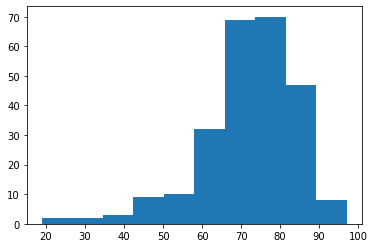

In [20]:
plt.hist(df_games_ps4['Critic_Score'])

In [21]:
#Тест Манна-Уитни т.к. распределение не относится к нормальному
stat, p = stats.mannwhitneyu(df_games_pc['Critic_Score'], df_games_ps4['Critic_Score'], nan_policy = 'omit')
print(f'Статистика: {stat:.3f}, p: {p:.6f}')

if p < 0.5:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Статистика: 106906.500, p: 0.000010
Отвергаем нулевую гипотезу


In [22]:
if df_games_pc['Critic_Score'].mean() > df_games_ps4['Critic_Score'].mean():
    print('В среднем критики оценивают игры на PC выше, чем игры остальных жанров')
else:
    print('В среднем критики оценивают игры на PC ниже, чем игры остальных жанров')

В среднем критики оценивают игры на PC выше, чем игры остальных жанров


На основе результатов теста Манна-Уитни мы можем предположить, что в среднем критики оценивают игры на PC и на PS4 по-разному. Средняя оценка игр на PC немного выше, чем на PS4.

**Критикам больше нравятся стрелялки или стратегии?**

H0: В среднем критики одинаково относятся к играм жанров Shooter и Strategy

H1: В среднем критики по-разному относятся к играм жанров Shooter и Strategy

In [23]:
#Создаём df с жанрами Shooter и Strategy
df_games_shooter = df_games[['Name', 'Genre', 'Critic_Score']].loc[df_games['Genre'] == 'Shooter']
df_games_strategy = df_games[['Name', 'Genre', 'Critic_Score']].loc[df_games['Genre'] == 'Strategy']

In [24]:
df_games_shooter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 9 to 16710
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1323 non-null   object 
 1   Genre         1323 non-null   object 
 2   Critic_Score  944 non-null    float64
dtypes: float64(1), object(2)
memory usage: 41.3+ KB


In [25]:
df_games_shooter.describe()

,Critic_Score
count,944.000000
mean,70.181144
std,14.552571
min,22.000000
25%,61.000000
50%,73.000000
75%,81.000000
max,97.000000


(array([  3.,  26.,  36.,  56.,  82., 113., 208., 206., 167.,  47.]),
 array([22. , 29.5, 37. , 44.5, 52. , 59.5, 67. , 74.5, 82. , 89.5, 97. ]),
 <BarContainer object of 10 artists>)

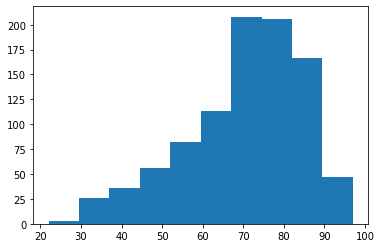

In [26]:
plt.hist(df_games_shooter['Critic_Score'])

In [27]:
df_games_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 168 to 16706
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          683 non-null    object 
 1   Genre         683 non-null    object 
 2   Critic_Score  302 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.3+ KB


In [28]:
df_games_strategy.describe()

,Critic_Score
count,302.000000
mean,72.086093
std,11.828475
min,35.000000
25%,65.000000
50%,73.000000
75%,80.000000
max,94.000000


(array([ 3.,  6., 13., 15., 37., 53., 58., 61., 34., 22.]),
 array([35. , 40.9, 46.8, 52.7, 58.6, 64.5, 70.4, 76.3, 82.2, 88.1, 94. ]),
 <BarContainer object of 10 artists>)

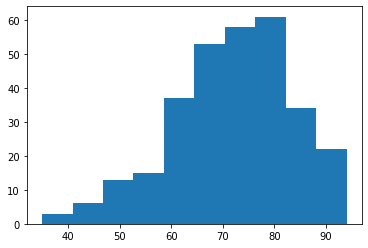

In [29]:
plt.hist(df_games_strategy['Critic_Score'])

In [30]:
#Тест Манна-Уитни т.к. распределение не относится к нормальному
stat, p = stats.mannwhitneyu(df_games_shooter['Critic_Score'], df_games_strategy['Critic_Score'], nan_policy = 'omit')
print(f'Статистика: {stat:.3f}, p: {p:.3f}')

if p < 0.5:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Статистика: 136251.500, p: 0.248
Отвергаем нулевую гипотезу


In [31]:
if df_games_shooter['Critic_Score'].mean() > df_games_strategy['Critic_Score'].mean():
    print('В среднем критики оценивают игры Shooter выше, чем игры Strategy')
elif df_games_shooter['Critic_Score'].mean() == df_games_strategy['Critic_Score'].mean():
    print('В среднем критики оценивают игры Shooter одинаково, чем игры Strategy')
else:
    print('В среднем критики оценивают игры Shooter ниже, чем игры Strategy')

В среднем критики оценивают игры Shooter ниже, чем игры Strategy


На основе результатов теста Манна-Уитни мы можем предположить, что в среднем критики оценивают игры с жанрами Shooter и Strategy по-разному. Средняя оценка игр на Strategy немного выше, чем на Shooter.

#### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама.

In [32]:
df_mes_spam = pd.read_csv('spam.csv')
df_mes_spam.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [33]:
df_mes_spam['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [34]:
# 1. приведем все слова к нижнему регистру
df_mes_spam['Message'] = df_mes_spam['Message'].str.lower()
# проверим
df_mes_spam.head(15)

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
5,spam,freemsg hey there darling it's been 3 week's n...
6,ham,even my brother is not like to speak with me. ...
7,ham,as per your request 'melle melle (oru minnamin...
8,spam,winner!! as a valued network customer you have...
9,spam,had your mobile 11 months or more? u r entitle...


In [35]:
import re
# 2. уберем все служебные символы
df_mes_spam['Message'] = [re.sub('[\W_]+', ' ', text) for text in df_mes_spam['Message']]
df_mes_spam.head(15)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
5,spam,freemsg hey there darling it s been 3 week s n...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more u r entitled...


In [36]:
# 3. удалим стоп-слова 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

df_mes_spam['Message'] = df_mes_spam['Message'].str[1:-1].str.split(' ').tolist()
df_mes_spam['Message'] = pd.Series([[word for word in text if word not in stopwords_set] 
                                    for text in df_mes_spam['Message']])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alexandra_v/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
#проверяем
df_mes_spam['Message']

0       [jurong, point, crazy, available, bugis, n, gr...
1                           [k, lar, joking, wif, u, oni]
2       [ree, entry, 2, wkly, comp, win, fa, cup, fina...
3            [, dun, say, early, hor, u, c, already, say]
4            [ah, think, goes, usf, lives, around, thoug]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, 750, poun...
5568              [ill, ü, b, going, esplanade, fr, home]
5569                             [ity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                     [ofl, true, nam]
Name: Message, Length: 5572, dtype: object

In [38]:
# 4. приведём все слова к нормальной форме
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

df_mes_spam['Message'] = pd.Series([wordnet_lemmatizer.lemmatize(word) for word in text] 
                                   for text in df_mes_spam['Message'])

#проверяем
df_mes_spam['Message']

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/alexandra_v/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alexandra_v/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       [jurong, point, crazy, available, bugis, n, gr...
1                           [k, lar, joking, wif, u, oni]
2       [ree, entry, 2, wkly, comp, win, fa, cup, fina...
3            [, dun, say, early, hor, u, c, already, say]
4               [ah, think, go, usf, life, around, thoug]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, 750, poun...
5568              [ill, ü, b, going, esplanade, fr, home]
5569                              [ity, mood, suggestion]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                     [ofl, true, nam]
Name: Message, Length: 5572, dtype: object

In [39]:
# 5. Преобразуйте все сообщения в вектора TF-IDF

#преобразуем в строку, т.к. иначе AttributeError: 'list' object has no attribute 'lower'
df_mes_spam['Message'] = df_mes_spam['Message'].apply(lambda x: ' '.join(x))

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_mes_spam.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [40]:
tfidf_matrix.head()

,00,000,000pes,007,008704050406,0089,0121,01223585236,01223585334,0125698789,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# 6. Разделите данные на тестовые и тренировочные в соотношении 30/70, 
#укажите random_state=42. Используйте train_test_split;
from sklearn.model_selection import train_test_split

df_mes_spam.loc[df_mes_spam.Category == 'ham', 'Class'] = 1
df_mes_spam.loc[df_mes_spam.Category == 'spam', 'Class'] = 0

df_mes_spam['Class'] = df_mes_spam['Class'].astype('int')

spam_class = df_mes_spam['Class']

x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, spam_class, random_state = 42, test_size = 0.30)

In [42]:
# 7. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr.predict_proba(x_test)

lr.score(x_test, y_test)

0.9527511961722488

In [43]:
# 8. Опишите результаты при помощи confusion_matrix;

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pd.Series(y_pred))

# ошибки впредсказаниях 5 и 74

array([[ 150,   74],
       [   5, 1443]])

In [44]:
# 9. Постройте датафрейм, который будет содержать все исходные тексты сообщений, 
#классифицированные неправильно (с указанием фактического и предсказанного)
df_mes_spam_final = pd.DataFrame([y_test]).T 
df_mes_spam_final['Pred_cat'] = lr.predict(x_test) 
df_mes_spam_final = df_mes_spam_final.loc[((df_mes_spam_final['Class'] == 0) 
                                           & (df_mes_spam_final['Pred_cat'] == 1)) | 
                    ((df_mes_spam_final['Class'] == 1) & (df_mes_spam_final['Pred_cat'] == 0))]
#присоединили сообщения из первонач дф
df_mes_spam_final = df_mes_spam_final.merge(df_mes_spam, how='inner', left_index=True, right_index=True)
#удаляем ненужные колонки
df_mes_spam_final.drop('Class_x', axis=1, inplace=True)
df_mes_spam_final.drop('Class_y', axis=1, inplace=True)

#для расшифровки, что 0 - spam, 1 - ham
df_mes_spam_final.loc[df_mes_spam_final['Pred_cat'] == 1, 'Pred_cat'] = 'ham'
df_mes_spam_final.loc[df_mes_spam_final['Pred_cat'] == 0, 'Pred_cat'] = 'spam'

df_mes_spam_final

,Pred_cat,Category,Message
2952,spam,ham,ey free call
881,ham,spam,eminder downloaded content already paid goto h...
1961,ham,spam,uess somebody know secretly fancy wanna find g...
3864,ham,spam,h god found number glad text back xafter msg c...
2575,ham,spam,next amazing xxx picsfree1 video sent enjoy on...
...,...,...,...
4543,ham,spam,reemsg hi baby wow got new cam moby wanna c ho...
752,ham,spam,ou important customer service announcement pre...
309,ham,spam,hemob check newest selection content game tone...
495,spam,ham,free call
